# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1
5,Diego,60,Engenheiro,15000,2000,1,Solteiro,1
6,Denize,22,Estudante,1200,500,0,Solteiro,0
7,Claudio,24,Estudante,1500,250,1,Solteiro,0


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

In [71]:
df.shape

df['Limite_Credito'] = pd.to_numeric(df['Limite_Credito'], errors='coerce')
df['Salário'] = pd.to_numeric(df['Salário'], errors='coerce')


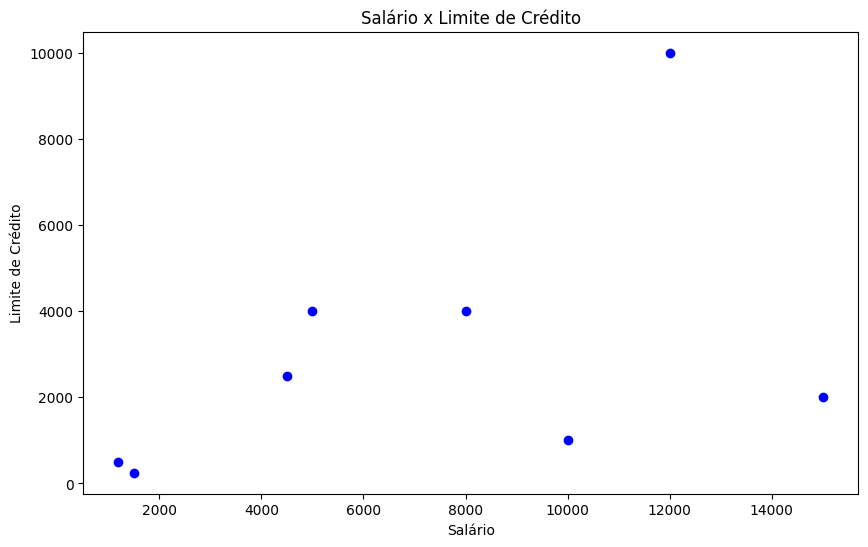

In [72]:
# 1° fator impulsionador de limite de crédito
# salário x limite de crédito

plt.figure(figsize=(10, 6))
plt.title('Salário x Limite de Crédito')
plt.xlabel('Salário')
plt.ylabel('Limite de Crédito')
plt.scatter(df['Salário'], df['Limite_Credito'], color='blue')
plt.show()


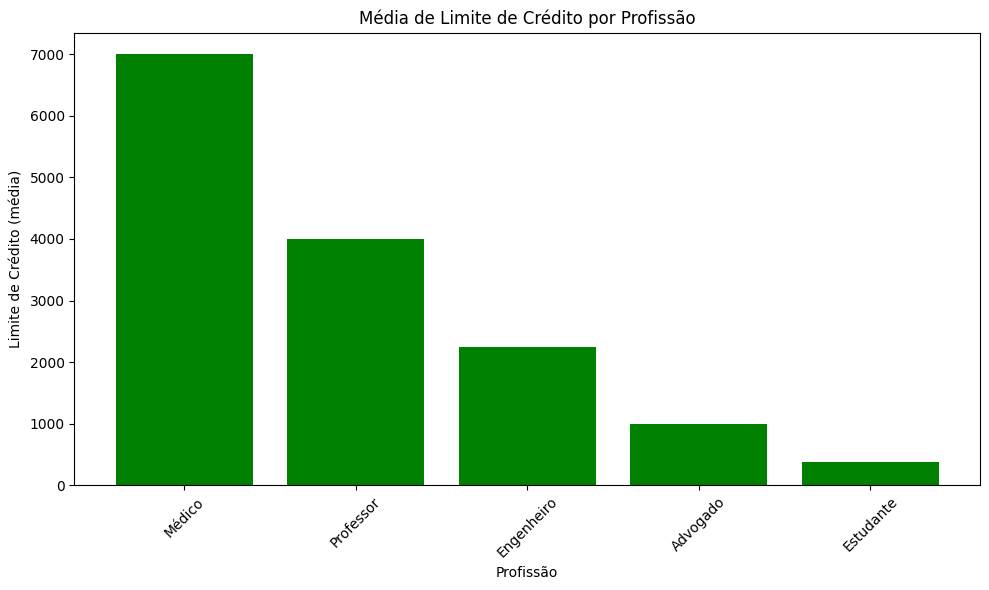

In [73]:
# 2° fator impulsionador de limite de crédito
# profissão x limite de crédito
media_limite = df.groupby('Profissão')['Limite_Credito'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.title('Média de Limite de Crédito por Profissão')
plt.xlabel('Profissão')
plt.ylabel('Limite de Crédito (média)')
plt.bar(media_limite.index, media_limite.values, color='green')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

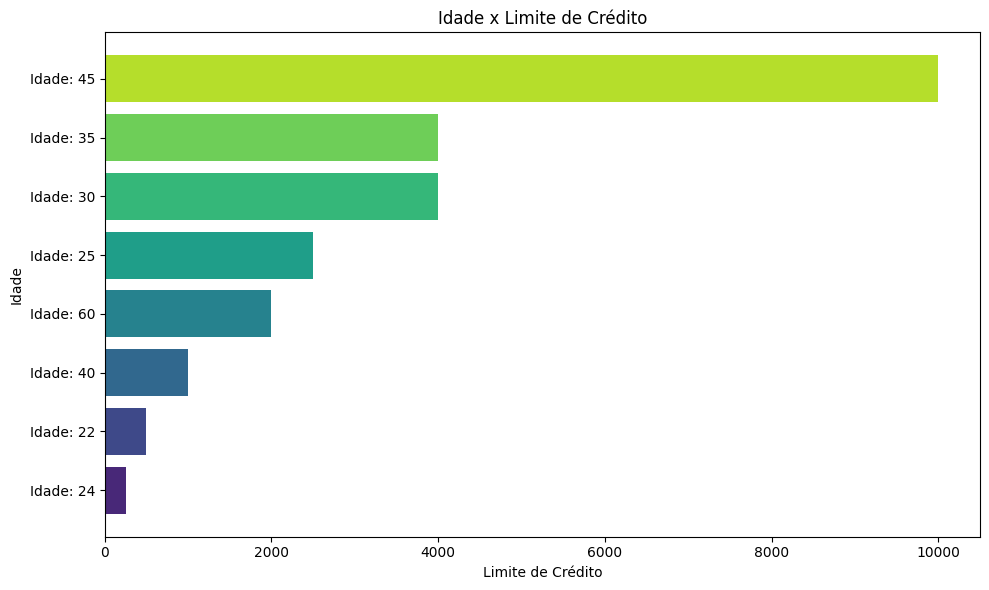

In [74]:
# 3° fator impulsionador de limite de crédito
# idade x limite de crédito

df['Label_Idade'] = df['Idade'].apply(lambda x: f"Idade: {x}")
df_ordenado = df.sort_values(by='Limite_Credito', ascending=True)
cores = sns.color_palette("viridis", len(df_ordenado))


plt.figure(figsize=(10, 6))
plt.barh(df_ordenado['Label_Idade'], df_ordenado['Limite_Credito'], color=cores)
plt.xlabel('Limite de Crédito')
plt.ylabel('Idade')
plt.title('Idade x Limite de Crédito')
plt.tight_layout()
plt.show()


